In [2]:
import numpy as np
import torch
from train_glm import train_glm
import matplotlib.pyplot as plt

# Train

In [5]:
base_dir = "/media/hdd01/sklee/"
experiment = "clust4-60"
cell_type = "CA1"

E_neural_file = "Espikes_neural.npy"
I_neural_file = "Ispikes_neural.npy"
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy"
C_syn_e_file = "handsub6_C_syn_e.npy"
C_syn_i_file = "handsub6_C_syn_i.npy"
C_den_file = "handsub6_C_den.npy"


E_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
I_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)
V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:50000].flatten()
C_syn_e = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_e_file)
C_syn_i = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_i_file)
C_den = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_den_file)

E_neural = torch.from_numpy(E_neural)
I_neural = torch.from_numpy(I_neural)
C_syn_e = torch.from_numpy(C_syn_e)
C_syn_i = torch.from_numpy(C_syn_i)
V = torch.from_numpy(V)
C_den = torch.from_numpy(C_den)

In [6]:
model_type = "gp"
T_train = 60 * 1000 * 5
T_test = 10 * 1000 * 5
T_no = 500
save_dir = base_dir+cell_type+"_"+experiment+"/"
device = torch.device("cuda")
sparse_no = 5

if model_type == "alpha":
    batch_size = 60000
    iter_no = 7500
    epoch_no = 1
    lr = 0.0025
elif model_type == "alpha_cos":
    batch_size = 4000
    iter_no = 7500
    epoch_no = 1
    #lr = 0.0007
    lr = 0.001
elif model_type == "alpha_hist":
    batch_size = 4000
    iter_no = 7500
    epoch_no = 1
    lr = 0.0025
elif model_type == "gp":
    batch_size = 60000
    iter_no = 10000
    epoch_no = 1
    lr = 0.1
elif model_type == "gp_hist":
    batch_size = 4000
    iter_no = 10000
    epoch_no = 5
    lr = 0.0005
elif model_type == "alpha_gp_hist":
    batch_size = 4000
    iter_no = 10000
    epoch_no = 5
    lr = 0.0005

In [4]:
train_glm(model_type, V, E_neural, I_neural, T_train, T_test,
                T_no, batch_size, iter_no, epoch_no, C_den, C_syn_e, C_syn_i, 
                sparse_no, device, lr, save_dir)

517


0 0.0057817934525499215
50 0.11088777600296007
100 0.14279049923496434
150 0.15372341724827343
200 0.17512645862405318
250 0.184358827811834
300 0.17427025082629632
350 0.2138480831986007
400 0.22420274665122975
450 0.18600366376043542
500 0.24696548957560405
550 0.24631829397031169
600 0.24830227958293283
650 0.2722897155714067
700 0.24213784524032467
750 0.27192294914351145
800 0.26289097416602814
850 0.28107614648753243
900 0.30002869510542496
950 0.31682462031180003
1000 0.42048096204642327
1050 0.461888412201505
1100 0.5035819804238146
1150 0.5068323597214168
1200 0.5600120342782062
1250 0.54720171613367
1300 0.5713640744847575
1350 0.5960804099881741
1400 0.6025477071421047
1450 0.5785560917764081
1500 0.609356568129636
1550 0.6220224018046305
1600 0.6291971772149145
1650 0.5622056006081524
1700 0.6326274875139695
1750 0.6330374637333139
1800 0.6468280608922047
1850 0.6487409912301382
1900 0.6243767185912574
1950 0.6554419639566684
2000 0.6466185552931628
2050 0.6642201887571948


In [7]:
output = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/"+model_type+"_sub6_output.npz")

In [8]:
test = output["test"]
C_syn_e = output["C_syn_e"]
C_syn_i = output["C_syn_i"]
filters = output["filters"]

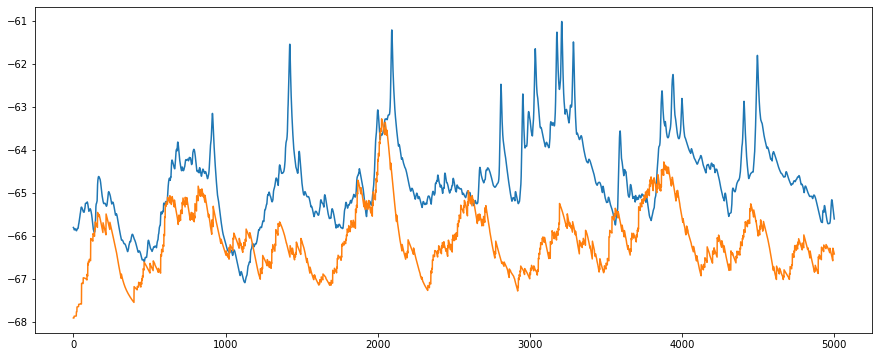

In [9]:
plt.figure(figsize = (15,6))
plt.plot(V[65000:80000][:5000])
plt.plot(test[:5000])

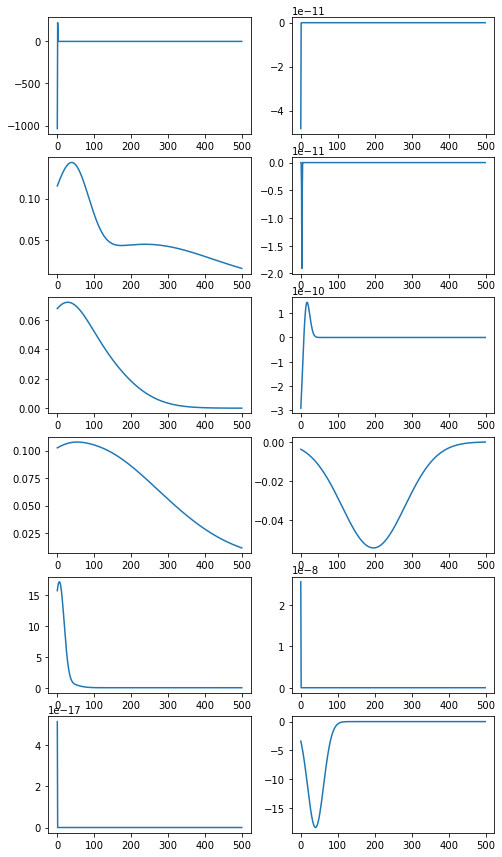

In [10]:
sub_no = 6

fig, axs = plt.subplots(nrows=sub_no, ncols=2, figsize = (8,15))
for i in range(sub_no):
    axs[i,0].plot(filters[i])
    axs[i,1].plot(filters[sub_no+i])
    #axs[i,2].plot(filters[sub_no*2+i])